In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
df=pd.DataFrame({'Time(years)':[0.0,0.5,1,1.5,2.0], 'Reservoir Pressure(psia)':[1798,1680,1540,1428,1335],
                 'Z':[0.869,0.870,0.880,0.890,.900],'Cumulative Gas Produced Gp(MMSCF)':[0.00,0.96,2.12,3.21,3.92]})
df


,Time(years),Reservoir Pressure(psia),Z,Cumulative Gas Produced Gp(MMSCF)
0,0.0,1798,0.869,0.00
1,0.5,1680,0.870,0.96
2,1.0,1540,0.880,2.12
3,1.5,1428,0.890,3.21
4,2.0,1335,0.900,3.92


In [6]:
df['P/Z']=df['Reservoir Pressure(psia)']/df['Z']
df

,Time(years),Reservoir Pressure(psia),Z,Cumulative Gas Produced Gp(MMSCF),P/Z
0,0.0,1798,0.869,0.00,2069.044879
1,0.5,1680,0.870,0.96,1931.034483
2,1.0,1540,0.880,2.12,1750.000000
3,1.5,1428,0.890,3.21,1604.494382
4,2.0,1335,0.900,3.92,1483.333333


Text(0.5, 1.0, 'Gas Material Balance')

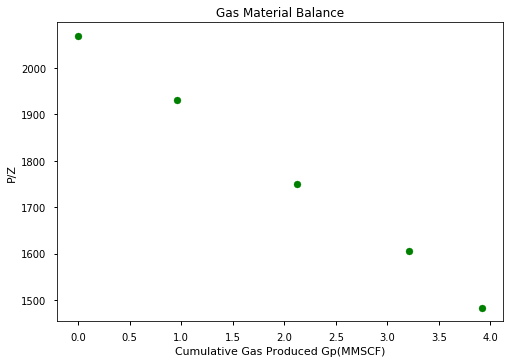

In [26]:
x=df['Cumulative Gas Produced Gp(MMSCF)']
y=df['P/Z']
plt.scatter(x,y,marker='o', color='green')
plt.xlabel('Cumulative Gas Produced Gp(MMSCF)')
plt.ylabel('P/Z')
plt.title('Gas Material Balance')

In [8]:
model= np.polyfit(x,y, 1)
model

array([-148.2874553 , 2070.38439919])

In [9]:
PZZ = np.arange(2070.38439919,0,-1)
GPP = (PZZ-2070.38439919)/-148.2874553

In [10]:
Df=pd.DataFrame({'Cumulative Gas Produced Gp(MMMSCF)':GPP, "P/Z": PZZ})
Df

,Cumulative Gas Produced Gp(MMMSCF),P/Z
0,-0.000000,2070.384399
1,0.006744,2069.384399
2,0.013487,2068.384399
3,0.020231,2067.384399
4,0.026975,2066.384399
...,...,...
2066,13.932399,4.384399
2067,13.939143,3.384399
2068,13.945886,2.384399
2069,13.952630,1.384399


In [11]:
Df['P/Z']



0       2070.384399
1       2069.384399
2       2068.384399
3       2067.384399
4       2066.384399
           ...     
2066       4.384399
2067       3.384399
2068       2.384399
2069       1.384399
2070       0.384399
Name: P/Z, Length: 2071, dtype: float64

In [21]:
Initial_gas_in_place=(0-2070.38439919)/-148.2874553
Initial_gas_in_place
G=Initial_gas_in_place
G

13.96196593300094

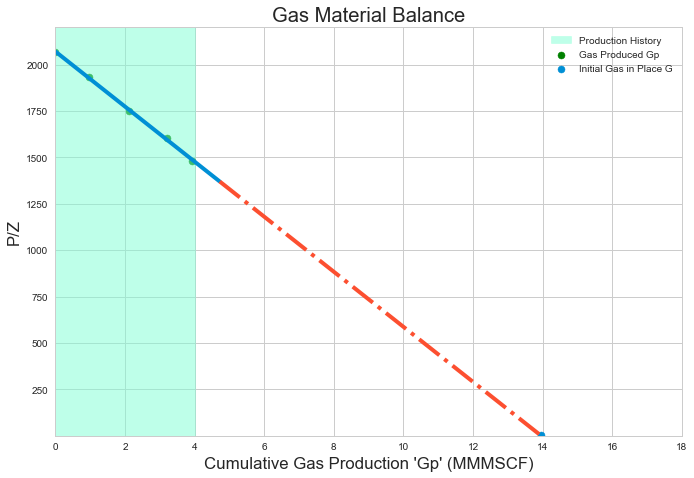

The Gas Initially in place is 13.96196593300094 MMMSCF


In [31]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))
plt.plot(Df['Cumulative Gas Produced Gp(MMMSCF)'][1:700], Df['P/Z'][1:700])
plt.plot(Df['Cumulative Gas Produced Gp(MMMSCF)'][700:2071], Df['P/Z'][700:2071], ls='-.')
plt.scatter(x,y,marker = 'o',color = 'green',label = "Gas Produced Gp")
plt.scatter(G,5, label = "Initial Gas in Place G")
plt.xlim(0,18)
plt.ylim(1,2200)
plt.axvspan(0,4,alpha=0.5,label='Production History', color='aquamarine')
plt.xlabel("Cumulative Gas Production 'Gp' (MMMSCF)")
plt.ylabel("P/Z")
plt.title("Gas Material Balance")
plt.legend(loc='upper right')
plt.show()
print("The Gas Initially in place is",G,"MMMSCF")
